This is for Figure 2(b).

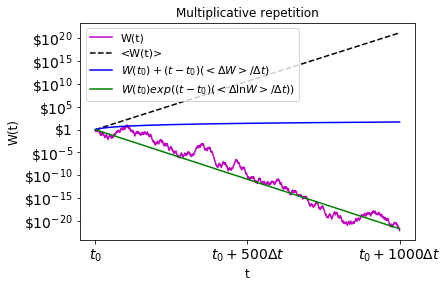

In [83]:
import math
import matplotlib
import matplotlib.pyplot as pyplot
import numpy
import random

# In the beginning, we only have $1.
magenta = [1]
# Expectation value of W.
dashed = [1]
# Expected additive rate of change.
blue = [1]
# Expected exponential growth rate.
green = [1]
# We gamble for this many rounds.
T = 1000

# Expectation value of growth factors.
avg_r = (0.6 + 1.5) / 2

# Expectation value of rate of change, and exponential growth rate.
N = 2**16
expected_rate_of_change_cumulative_sum = 0
expected_exponential_growth_rate_cumulative_sum = 0
for i in range(N):
    expected_rate_of_change_cumulative_sum += random.choice([0.6, 1.5]) - 1
    expected_exponential_growth_rate_cumulative_sum += math.log(random.choice([0.6, 1.5]))
expected_rate_of_change = expected_rate_of_change_cumulative_sum / N
expected_exponential_growth_rate = expected_exponential_growth_rate_cumulative_sum / N

# Then we do multiplicative repetition for 1,000 times.
for t in range(1, T+1):
    # 50% chance of 0.6x what we had before, or
    # 50% chance of 1.5x what we had before.
    magenta.append(magenta[t-1] * random.choice([0.6, 1.5]))
    dashed.append(math.exp(t * math.log(avg_r)))
    blue.append(1 + t * expected_rate_of_change)
    green.append(math.exp(t * expected_exponential_growth_rate))

# Plotting time.
x = numpy.arange(T+1)
pyplot.plot(x, numpy.log10(magenta), 'm-', label='W(t)')
pyplot.plot(x, numpy.log10(dashed), 'k--', label='<W(t)>')
pyplot.plot(x, numpy.log10(blue), 'b-', label='$W(t_0) + (t-t_0)(<\Delta W> / \Delta t)$')
pyplot.plot(x, numpy.log10(green), 'g-', label='$W(t_0)exp((t-t_0)(<\Delta \ln W> / \Delta t))$')

pyplot.xlabel('t', fontsize=12)
xticks = [0, 500, 1000]
xlabels = ['$t_{0}$', '$t_{0}+500 \Delta t$',  '$t_{0}+1000 \Delta t$']
pyplot.xticks(xticks, xlabels, fontsize=14)

pyplot.ylabel('W(t)', fontsize=12)
yticks = [20, 15, 10, 5, 0, -5, -10, -15, -20]
ylabels = ['\$$10^{20}$', '\$$10^{15}$', '\$$10^{10}$', '\$$10^{5}$',
           '\$1',
           '\$$10^{-5}$', '\$$10^{-10}$', '\$$10^{-15}$', '\$$10^{-20}$']
pyplot.yticks(yticks, ylabels, fontsize=14)

pyplot.legend(loc='upper left', fontsize=11)
pyplot.title('Multiplicative repetition')
pyplot.show()